In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [103]:
UR = pd.read_csv('../Unemployment_rate.csv')
TCC = pd.read_csv('../new_cases_covid_by_month.csv')

In [112]:
TCC.head()

,Unnamed: 0,Year_Month,new_case
0,0,2020-01-01,9
1,1,2020-02-01,73
2,2,2020-03-01,212056
3,3,2020-04-01,877228
4,4,2020-05-01,743214


In [105]:
TCC['Year_Month']=pd.to_datetime(TCC['Year_Month'],format='%Y-%m')

In [111]:
TCC.head()

,Unnamed: 0,Year_Month,new_case
0,0,2020-01-01,9
1,1,2020-02-01,73
2,2,2020-03-01,212056
3,3,2020-04-01,877228
4,4,2020-05-01,743214


In [65]:
UR.head()

,Series ID,Year,Period,Label,Value
0,LNS14000000,2018,M01,2018 Jan,4.0
1,LNS14000000,2018,M02,2018 Feb,4.1
2,LNS14000000,2018,M03,2018 Mar,4.0
3,LNS14000000,2018,M04,2018 Apr,4.0
4,LNS14000000,2018,M05,2018 May,3.8


In [113]:
UR['Label']=pd.to_datetime(UR['Label'],format='%Y %b')


In [114]:
UR.head()


,Series ID,Year,Period,Label,Value
0,LNS14000000,2018,M01,2018-01-01,4.0
1,LNS14000000,2018,M02,2018-02-01,4.1
2,LNS14000000,2018,M03,2018-03-01,4.0
3,LNS14000000,2018,M04,2018-04-01,4.0
4,LNS14000000,2018,M05,2018-05-01,3.8


In [115]:
UR.columns = ['SERIES', 'YEAR', 'PERIOD', 'Year_Month', 'Unemployment Rate %']
UR.head()

,SERIES,YEAR,PERIOD,Year_Month,Unemployment Rate %
0,LNS14000000,2018,M01,2018-01-01,4.0
1,LNS14000000,2018,M02,2018-02-01,4.1
2,LNS14000000,2018,M03,2018-03-01,4.0
3,LNS14000000,2018,M04,2018-04-01,4.0
4,LNS14000000,2018,M05,2018-05-01,3.8


In [116]:
UR_and_TCC = pd.merge(UR, TCC, how='inner', on='Year_Month')


In [117]:
UR_and_TCC

,SERIES,YEAR,PERIOD,Year_Month,Unemployment Rate %,Unnamed: 0,new_case
0,LNS14000000,2020,M01,2020-01-01,3.5,0,9
1,LNS14000000,2020,M02,2020-02-01,3.5,1,73
2,LNS14000000,2020,M03,2020-03-01,4.4,2,212056
3,LNS14000000,2020,M04,2020-04-01,14.7,3,877228
4,LNS14000000,2020,M05,2020-05-01,13.2,4,743214
5,LNS14000000,2020,M06,2020-06-01,11.0,5,862148
6,LNS14000000,2020,M07,2020-07-01,10.2,6,1939039
7,LNS14000000,2020,M08,2020-08-01,8.4,7,1476290
8,LNS14000000,2020,M09,2020-09-01,7.9,8,1219711
9,LNS14000000,2020,M10,2020-10-01,6.9,9,1934324


In [132]:
def lregress(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print('R-value:', rvalue)

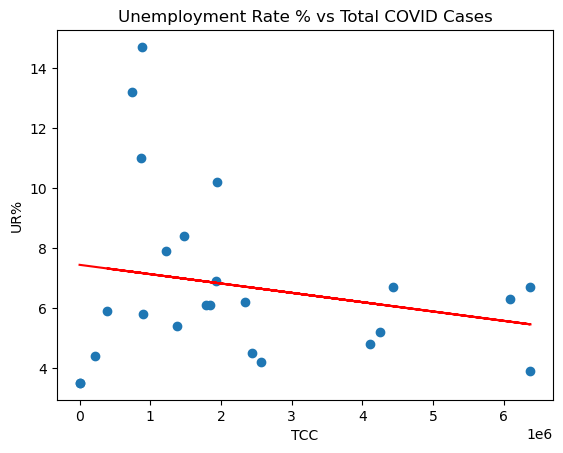

R-value: -0.21046392489639487


In [137]:
x_values = UR_and_TCC["new_case"]
y_values = UR_and_TCC["Unemployment Rate %"]
lregress(x_values, y_values, 'Unemployment Rate % vs Total COVID Cases', 'TCC', 'UR%', (10000000, 20))